In [81]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv('E:/Full Stack Data Scientist Bootcamp/datasets/titanic.csv')
data

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
# when we look at the cabin and age column data we find from the domin expert the relation ship between them so the this data 
# is not MCAR 
# but when we look at the Embarked data i seen that their is no relation between the data

In [85]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [86]:
data['Cabin_null']=np.where(data['Cabin'].isna(),1,0)

In [87]:
data['Cabin_null'].value_counts()

1    687
0    204
Name: Cabin_null, dtype: int64

In [88]:
data['Cabin_null'].mean()

0.7710437710437711

In [89]:
data.groupby(['Survived','Cabin_null']).size()

Survived  Cabin_null
0         0              68
          1             481
1         0             136
          1             206
dtype: int64

In [90]:
data.groupby(['Survived'])['Cabin_null'].size()


Survived
0    549
1    342
Name: Cabin_null, dtype: int64

In [91]:
# Missing at Random

### All technique for the handling the missing values 
###### 1. Mean/Median/Mode replacement
###### 2. Random Sample Imputation 
###### 3. Capturing the NAN values with a few feature
###### 4. End of Distribution imputation
###### 5. Arbitrary imputation 
###### 6. Frequent Categories Imputation 

In [92]:
# Mean/Median/Mode replacement
# when use???
# When missing data is MCAR 

In [93]:
df=pd.read_csv('E:/Full Stack Data Scientist Bootcamp/datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [94]:
df.isna().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [95]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [96]:
def imput_nan(df,col,by_):
    b="without_nan_"+col
    df[b]=df[col].fillna(by_)

In [97]:
by_=df['Age'].median()
imput_nan(df,'Age',by_)

In [98]:
df.head()

,Survived,Age,Fare,without_nan_Age
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [99]:
print(df.Age.std())
print(df.without_nan_Age.std())

14.526497332334044
13.019696550973194


In [100]:
df.without_nan_Age.isna().sum()

0

In [101]:
print(df.Age.var())
print(df.without_nan_Age.var())

211.0191247463081
169.51249827942328


In [102]:
df[df['Age'].isna()]

,Survived,Age,Fare,without_nan_Age
5,0,NaN,8.4583,28.0
17,1,NaN,13.0000,28.0
19,1,NaN,7.2250,28.0
26,0,NaN,7.2250,28.0
28,1,NaN,7.8792,28.0
...,...,...,...,...
859,0,NaN,7.2292,28.0
863,0,NaN,69.5500,28.0
868,0,NaN,9.5000,28.0
878,0,NaN,7.8958,28.0


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

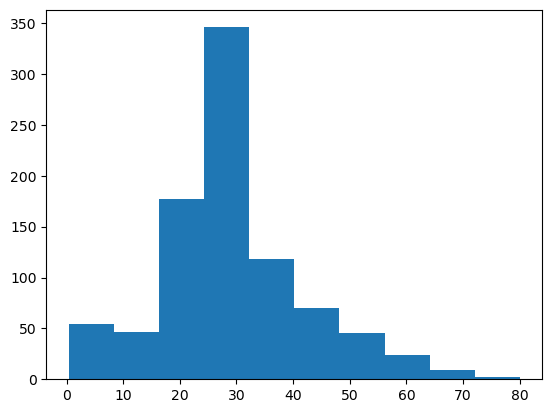

In [103]:
plt.hist(df['without_nan_Age'])

In [104]:
# 2. Random Sample Imputation
df=pd.read_csv('E:/Full Stack Data Scientist Bootcamp/datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

radom_sampling_for_nan=df["Age"].dropna().sample(df['Age'].isna().sum(),random_state=0)
radom_sampling_for_nan.sort_index()

1      38.0
9      14.0
11     58.0
15     55.0
20     35.0
       ... 
861    21.0
874    28.0
882    22.0
885    39.0
889    26.0
Name: Age, Length: 177, dtype: float64

In [105]:
df[df['Age'].isna()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [106]:
radom_sampling_for_nan.index=df[df['Age'].isna()].index
radom_sampling_for_nan.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [107]:
radom_sampling_for_nan.sort_index()

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [108]:
df['random_sampling_replacing']=df['Age']

In [109]:
df.loc[df['Age'].isnull(),'random_sampling_replacing']=radom_sampling_for_nan

In [110]:
df.isna().sum()

Survived                       0
Age                          177
Fare                           0
random_sampling_replacing      0
dtype: int64

In [111]:
# def inpute_random_sampling(df,col,by_):
#     df[col].dropna().sample()
#     df['random_sampling_replacing']=df[col]
#     radom_sampling=df[col].dropna().sample(df[col].isna().sum(),random_state=0)
#     radom_sampling.index=df[df[col].isna()].index
#     df.loc[df[col].isnull(),'random_sampling_replacing']=radom_sampling


(array([ 70.,  54., 221., 209., 153.,  83.,  55.,  32.,  11.,   3.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

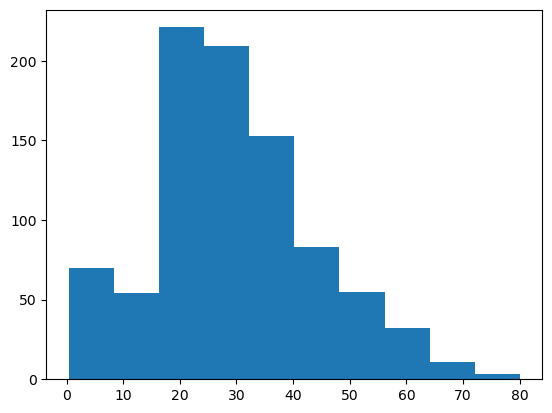

In [112]:
import matplotlib.pyplot as plt
plt.hist(df['random_sampling_replacing'])

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

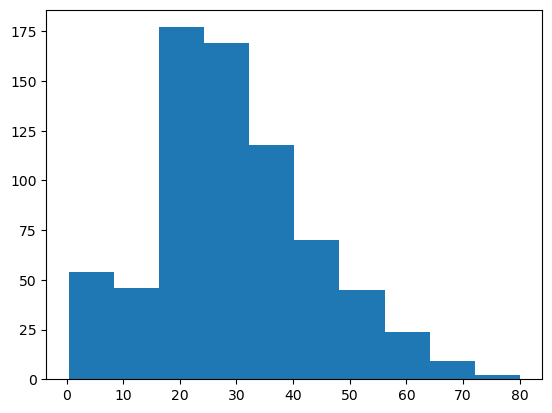

In [113]:
plt.hist(df['Age'])

In [114]:
df.isna().sum()

Survived                       0
Age                          177
Fare                           0
random_sampling_replacing      0
dtype: int64

In [115]:
# 3. Capturing the NAN values with the new featrue
# this is best for when the data is not missing completely at random


In [116]:
df=pd.read_csv('E:/Full Stack Data Scientist Bootcamp/datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [118]:
df['new_featur_technique_of_nan']=np.where(df['Age'].isna(),1,0)

In [122]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [123]:
df

,Survived,Age,Fare,new_featur_technique_of_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


In [124]:
# 4. End of Distribution
df=pd.read_csv('E:/Full Stack Data Scientist Bootcamp/datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [126]:
extream_value=df.Age.mean()+(3*df.Age.std())
extream_value

73.27860964406095

In [128]:
df['end_of_distribution_techinque_of_nan_value']=df.Age.fillna(extream_value)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [130]:
df.Age.fillna(df.Age.median(),inplace=True)

In [131]:
df

,Survived,Age,Fare,end_of_distribution_techinque_of_nan_value
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


<AxesSubplot:>

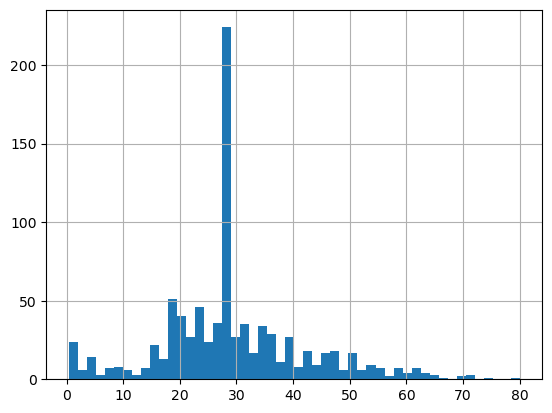

In [133]:
df['Age'].hist(bins=50)

<AxesSubplot:>

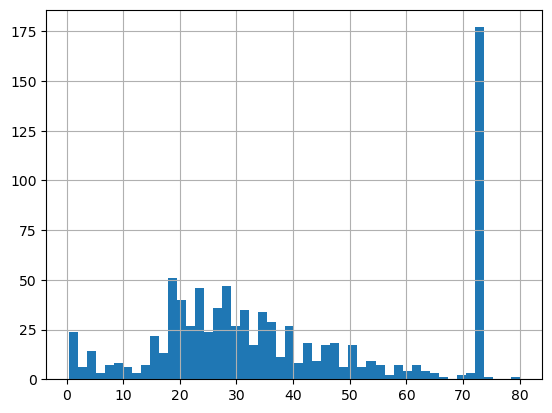

In [134]:
df['end_of_distribution_techinque_of_nan_value'].hist(bins=50)

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

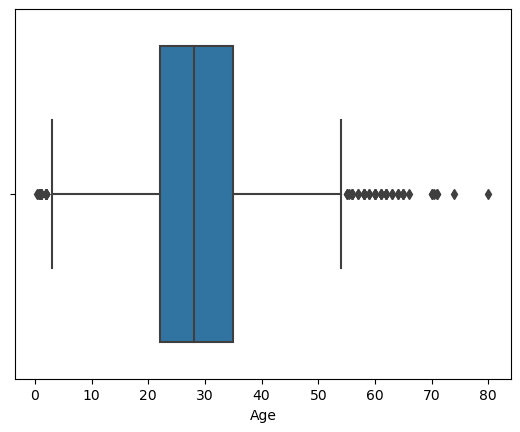

In [135]:
sns.boxplot(df['Age'])

<IPython.core.display.Javascript object>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='end_of_distribution_techinque_of_nan_value'>

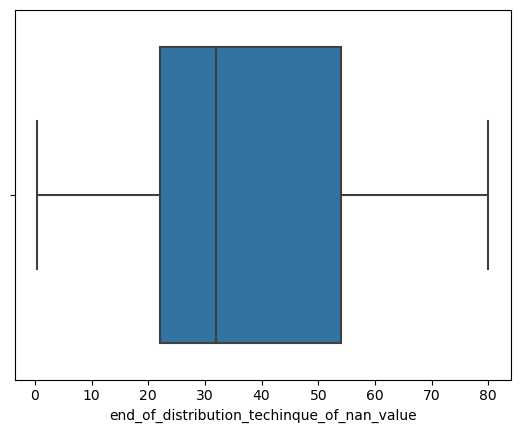

In [136]:
sns.boxplot(df['end_of_distribution_techinque_of_nan_value'])

In [144]:
# # 5. Arbitrary value imputation
# in this technique replacing the NAN values by the arbitray values
df=pd.read_csv('E:/Full Stack Data Scientist Bootcamp/datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

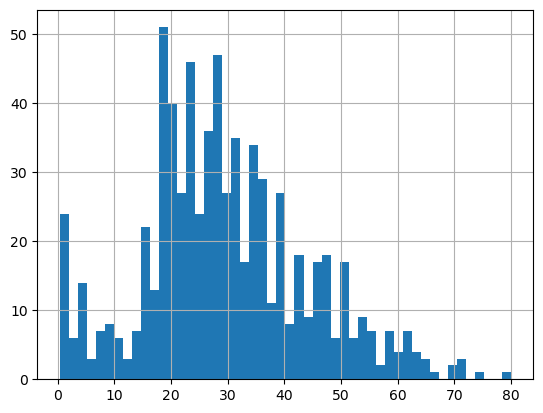

In [145]:
# Aribrary value should contain the not frequent values 
df['Age'].hist(bins=50)

In [146]:
df['Aribitray_technique_0']=df['Age'].fillna(0)
df['Aribitray_technique_100']=df['Age'].fillna(100)

In [147]:
df

,Survived,Age,Fare,Aribitray_technique_0,Aribitray_technique_100
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,0.0,100.0
889,1,26.0,30.0000,26.0,26.0
